In [1]:
from __future__ import print_function

In [2]:
# We'll need numpy for some mathematical operations, and Pandas for some data shaping.
import numpy as np
import pandas as pd

# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [69]:
# enter audio path in here
audio_path = "./songs/mp3_m4a/Bonobo_Migration.m4a"

/Users/Jasper/.local/share/virtualenvs/songShape-4cFIEXvm/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


[[1.47933880e-04 1.48007419e-04 1.48153123e-04 ... 1.21048797e-06
  4.40340140e-07 4.22955836e-07]
 [1.88463549e-04 1.88253766e-04 1.87835034e-04 ... 1.16387641e-05
  1.16734906e-05 1.16591947e-05]
 [7.54430126e-05 7.59493517e-05 7.69227287e-05 ... 7.27679576e-06
  7.23990198e-06 7.23260186e-06]
 ...
 [0.00000000e+00 1.77706907e-05 4.18306024e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.03342097e-05 3.25462859e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.81142651e-05 1.09507148e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


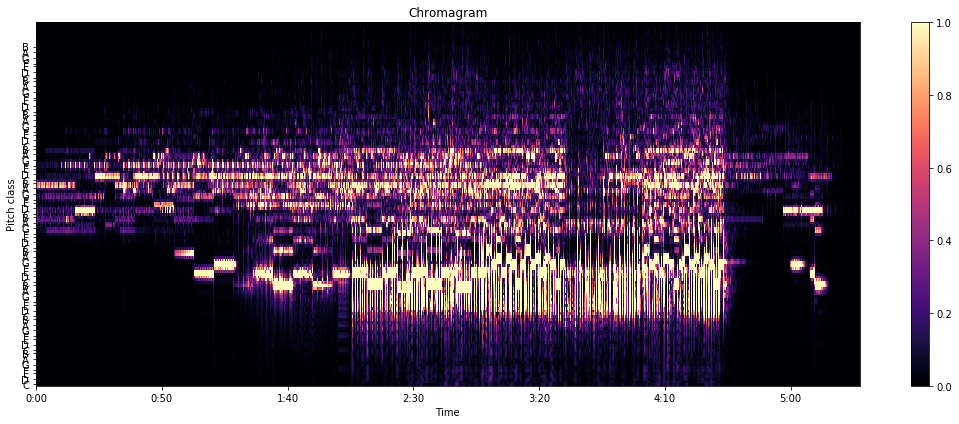

In [70]:
y, sr = librosa.load(audio_path)

#split out the harmonic and percussive audio
y_harmonic, y_percussive = librosa.effects.hpss(y)

#map out the values into an array
cqt = np.abs(librosa.cqt(y, sr=sr, n_bins=128, fmin=6, bins_per_octave=12))
cqt_h = np.abs(librosa.cqt(y_harmonic, sr=sr, n_bins=128, fmin=6, bins_per_octave=12))


# Make a new figure
plt.figure(figsize=(15,6))

librosa.display.specshow(cqt, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()
plt.tight_layout()
print(cqt)

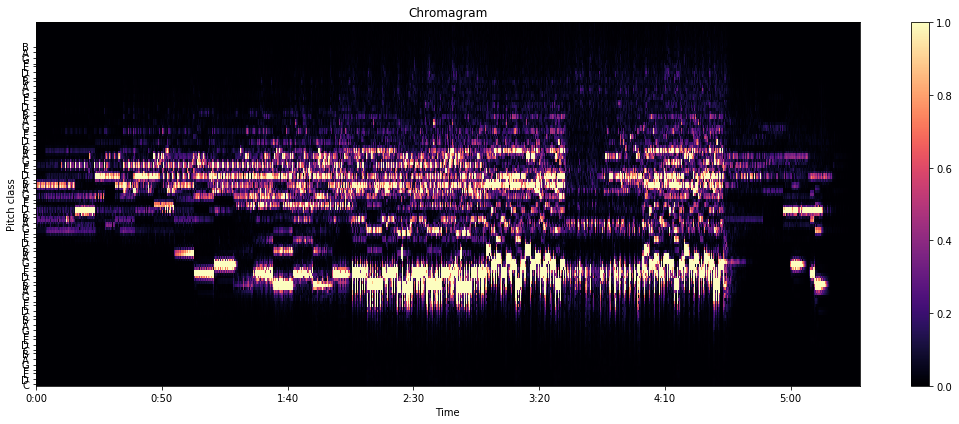

In [71]:
# Make a new figure, just for harmonic (no percussion)
plt.figure(figsize=(15,6))

librosa.display.specshow(cqt_h, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()
plt.tight_layout()

In [90]:
# Now, to convert the array to a Pandas DF:
midi = pd.read_csv('./midi_metadata.csv')
# print(midi)
c_df = pd.DataFrame(cqt).reset_index().melt(id_vars='index').rename(columns={'index': "Note", "variable": "Time"})
print(c_df)
c_df_summary = c_df.groupby(['Note']).mean()
# print(c_df)
print(c_df_summary)

         Note   Time     value
0           0      0  0.000148
1           1      0  0.000188
2           2      0  0.000075
3           3      0  0.000049
4           4      0  0.000551
...       ...    ...       ...
1804795   123  14099  0.000000
1804796   124  14099  0.000000
1804797   125  14099  0.000000
1804798   126  14099  0.000000
1804799   127  14099  0.000000

[1804800 rows x 3 columns]
         value
Note          
0     0.028868
1     0.030101
2     0.030456
3     0.033426
4     0.030554
...        ...
123   0.008359
124   0.007863
125   0.007387
126   0.006918
127   0.006486

[128 rows x 1 columns]


In [42]:


y, sr = librosa.load(audio_path)
y_harmonic, y_percussive = librosa.effects.hpss(y)

# What do the spectrograms look like?
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.power_to_db(S_harmonic, ref=np.max)
log_Sp = librosa.power_to_db(S_percussive, ref=np.max)

/Users/Jasper/.local/share/virtualenvs/songShape-4cFIEXvm/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


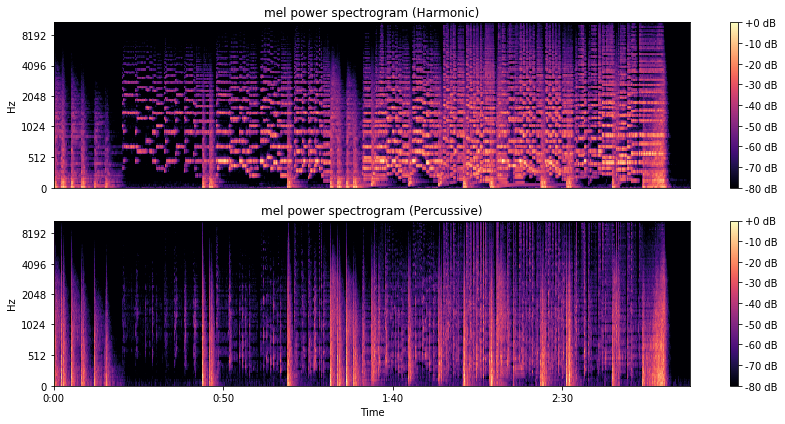

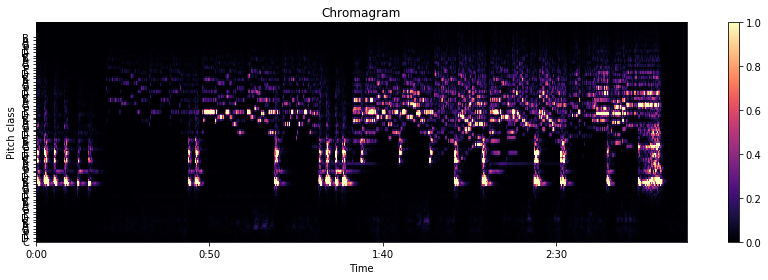

In [47]:
# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

# We'll use a CQT-based chromagram with 36 bins-per-octave in the CQT analysis.  An STFT-based implementation also exists in chroma_stft()
# We'll use the harmonic component to avoid pollution from transients
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr, bins_per_octave=36)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(cqt, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()